In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:

from os import path
path = '/content/drive/MyDrive/CSV/housing.csv'
df = pd.read_csv(path)

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [148]:
df_new = df[["longitude","latitude"]]
df_new.head

<bound method NDFrame.head of        longitude  latitude
0        -122.23     37.88
1        -122.22     37.86
2        -122.24     37.85
3        -122.25     37.85
4        -122.25     37.85
...          ...       ...
20635    -121.09     39.48
20636    -121.21     39.49
20637    -121.22     39.43
20638    -121.32     39.43
20639    -121.24     39.37

[20640 rows x 2 columns]>

In [149]:
df_new.describe()

,longitude,latitude
count,20640.000000,20640.000000
mean,-119.569704,35.631861
std,2.003532,2.135952
min,-124.350000,32.540000
25%,-121.800000,33.930000
50%,-118.490000,34.260000
75%,-118.010000,37.710000
max,-114.310000,41.950000


In [150]:
df_new.isnull().sum()

longitude    0
latitude     0
dtype: int64

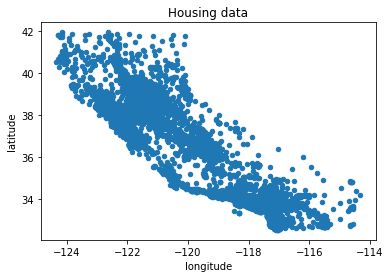

In [151]:

df.plot(kind='scatter', x= 'longitude', y='latitude')

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title ('Housing data')
plt.show()

In [173]:
inertia_list = []
for num_clusters in np.arange(1, 21):
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(df)
  inertia_list.append(kmeans.inertia_)

In [174]:

inertia_list

[177008.98028089074,
 26623.85891120832,
 18287.012026287273,
 14263.013295198161,
 10339.985240475542,
 8022.066923680652,
 6814.012706032418,
 6046.896012117864,
 5277.126466782399,
 4679.822065990926,
 4315.111941412062,
 3930.5133235573567,
 3472.026585615199,
 3155.678625914321,
 2779.260908933493,
 2533.0604960056717,
 2325.8940361138284,
 2249.9339618153244,
 2077.1286696671336,
 2022.8278653171042]

<function matplotlib.pyplot.show(*args, **kw)>

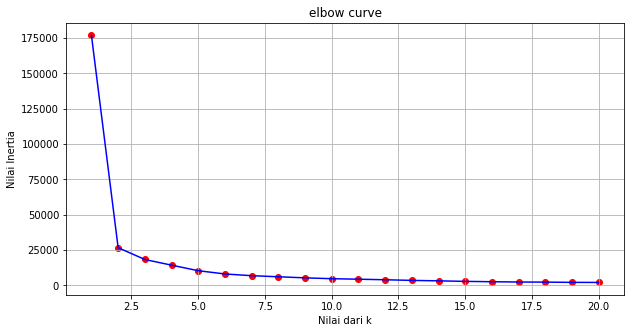

In [177]:

#plotting menggunakan elbow cuve
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list, color='blue')
plt.scatter(np.arange(1, 21), inertia_list, color='red')
plt.grid(True)
plt.xlabel('Nilai dari k')
plt.ylabel('Nilai Inertia')
plt.title('elbow curve')
plt.show

In [152]:
k = 3
np.random.seed(40)

random_centroids=[]
for i in range(1, k+1):
  random_centroids.append([np.random.randint(-124,-114), np.random.randint(32,42)])
print('Randomly selected points as random_centroids:',random_centroids)

Randomly selected points as random_centroids: [[-118, 39], [-119, 40], [-116, 34]]


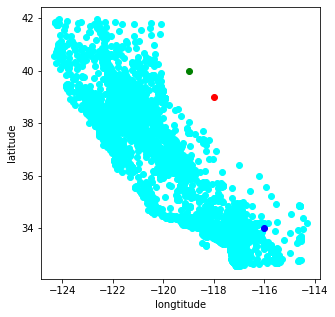

In [153]:
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color='cyan')
length =len(random_centroids)
colors1=['r', 'g', 'b', 'cyan', 'yellow', 'black']
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
plt.xlabel('longtitude')
plt.ylabel('latitude')
plt.show()

In [154]:
#Langkah kedua

#Here, we are calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster
def assignment(df_new,random_centroids):

  for i in range(length) :
    df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2))
   
  list1=[]
  list2=[]
  for a,b,c in zip(df_new['Distance from Centroid 0'],df_new['Distance from Centroid 1'],df_new['Distance from Centroid 2']):
    d = min(a,b,c)
   
    if d == a:
      list1.append(0)
      list2.append('r')
    elif d == b:
      list1.append(1)
      list2.append('g')
    else:
      list1.append(2)
      list2.append('b')
  df_new['Closest_Centroid'] = list1
  df_new['Color']=list2
  return df_new

In [155]:

df_new = assignment(df_new, random_centroids)
df_new.head()

,longitude,latitude,Distance from Centroid 0,Distance from Centroid 1,Distance from Centroid 2,Closest_Centroid,Color
0,-122.23,37.88,4.375763,3.863586,7.339435,1,g
1,-122.22,37.86,4.371270,3.866264,7.320383,1,g
2,-122.24,37.85,4.393188,3.888457,7.332128,1,g
3,-122.25,37.85,4.402840,3.896794,7.340640,1,g
4,-122.25,37.85,4.402840,3.896794,7.340640,1,g


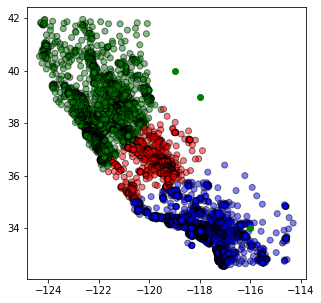

In [156]:
#Penempatan Cluster
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color =df_new['Color'],alpha = 0.5,edgecolor = 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[1])

In [162]:
#step-3
#UPDATE DATA
#UPDATE CENTROID TITIK YANG BARU
#Update Stage
def update(parameter):
  for i in range(length):
    random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroid']== i]['longitude'])
    random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroid']== i]['latitude'])
    return parameter

In [163]:
random_centroids = update(random_centroids)
random_centroids

[[nan, 39], [-119, 40], [-116, 34]]

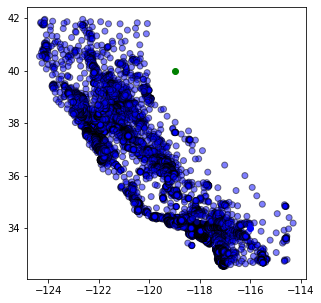

In [165]:
#step last
#mencari titik centroid paling tepat
df_new = assignment(df_new, random_centroids)
df_new.head()
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')
for i in range(length):
  plt.scatter(*random_centroids[i], color=colors1[i])
plt.show()

In [167]:
#membaca 2 features
df = df[["longitude", "latitude"]]

In [168]:
#asumsi nilai k 
kmeans = KMeans(n_clusters=3)#membuat Objek K-means
kmeans.fit(df)#fitting the Model

KMeans(n_clusters=3)

In [169]:
#generate label tiap point
labels = kmeans.predict(df)
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [170]:

#menampilkan data centroid tiap cluster
centroids = kmeans.cluster_centers_
centroids

array([[-121.93015196,   38.11351449],
       [-117.88493836,   33.82435098],
       [-119.70940315,   35.9956267 ]])

In [171]:
#melihat inersia k-means
kmeans.inertia_

18287.012244011297

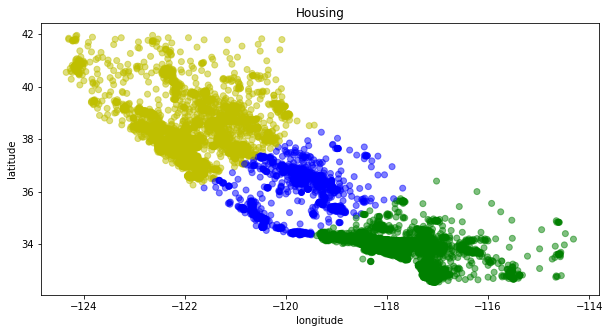

In [172]:

plt.figure(figsize=(10, 5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1],labels)
print(colors)
colors1=list(colors)
plt.scatter(df['longitude'], df['latitude'], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
  plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Housing')
plt.show()